In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [26]:
from scenario_input import base_scenario, adjust_timeseries_data, scenario_input_hps, scenario_input_evs
from ev_model import scale_electric_vehicles, model_input_evs
from heat_pump_model import model_input_hps

In [3]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times'], 'size':12})
rc('text', usetex=True)
import sys 
sys.path.append("C:/APPS/MiKTeX/21.7/fonts/source/public/rsfs")

# 4 Case Study

In [4]:
scenario_dict = base_scenario()
# import HP data
hp_mode = "inflexible"
scenario_dict = scenario_input_hps(scenario_dict=scenario_dict, mode=hp_mode)
nr_hp_mio = 19.4
nr_hp_mio, ts_heat_el, sum_energy_heat, capacity_tes, p_nom_hp, ts_heat_demand = \
            model_input_hps(
                scenario_dict=scenario_dict,
                hp_mode=hp_mode,
                nr_hp_mio=nr_hp_mio
            )
# import EV data
ev_mode = "inflexible"
scenario_dict = scenario_input_evs(scenario_dict=scenario_dict, mode=ev_mode, extended_flex=False)
nr_ev_mio = 48.8
(ref_charging, flexibility_bands) = scale_electric_vehicles(
            nr_ev_mio, scenario_dict)

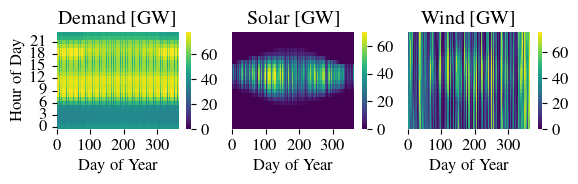

In [12]:
# plot input open_ego
# Todo: Demand minimum at 0, revert y-axis
df_plot = scenario_dict["ts_vres"].copy()
df_plot["Demand"] = scenario_dict["ts_demand"].sum(axis=1)
df_plot["Day of Year"] = df_plot.index.dayofyear
df_plot["Hour of Day"] = df_plot.index.hour
df_plot = df_plot.groupby(["Hour of Day", "Day of Year"]).mean().unstack()
figsize = (6,2)
fig, ax =  plt.subplots(1, 3, figsize=figsize)
ticks = [0, 20, 40, 60]
g = sns.heatmap(df_plot["Demand"], cmap='viridis', xticklabels=False, ax=ax[0],
                       cbar=True, linewidths=0, vmin=0, cbar_kws={'ticks': ticks})
g.invert_yaxis()
g = sns.heatmap(df_plot["solar"], cmap='viridis', xticklabels=False, ax=ax[1],
                       cbar=True, linewidths=0, vmin=0, cbar_kws={'ticks': ticks})
g.invert_yaxis()
g = sns.heatmap(df_plot["wind"], cmap='viridis', xticklabels=False, ax=ax[2],
                       cbar=True, linewidths=0, vmin=0, cbar_kws={'ticks': ticks})
g.invert_yaxis()
ax[1].set_ylabel("")
ax[1].set_yticks([])
ax[2].set_ylabel("")
ax[2].set_yticks([])
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].set_xticks([0,100,200,300], [0,100,200,300])
ax[1].set_xticks([0,100,200,300], [0,100,200,300])
ax[2].set_xticks([0,100,200,300], [0,100,200,300])
ax[0].set_title("Demand [GW]")
ax[1].set_title("Solar [GW]")
ax[2].set_title("Wind [GW]")
plt.tight_layout()
fig.subplots_adjust(wspace=0.15)
plt.savefig("results/plots/paper_dc_ego_input_heatmap.pdf")

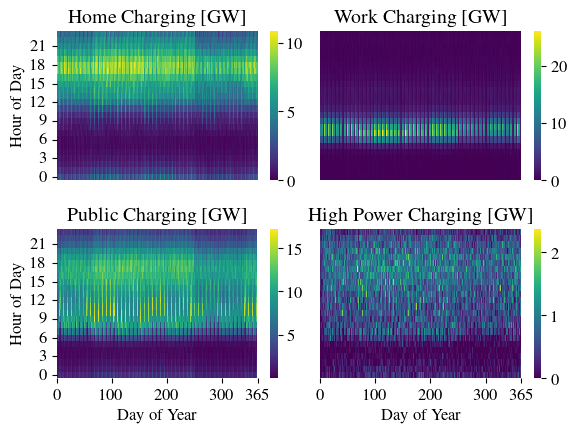

In [20]:
df_plot = ref_charging.copy()
df_plot["Day of Year"] = df_plot.index.dayofyear
df_plot["Hour of Day"] = df_plot.index.hour
df_plot = df_plot.groupby(["Hour of Day", "Day of Year"]).mean().unstack()
figsize = (6, 4.5)
fig, ax =  plt.subplots(2, 2, figsize=figsize)
title1="Home Charging [GW]"
g = sns.heatmap(df_plot["home"], cmap='viridis', xticklabels=False, ax=ax[(0,0)],
                       cbar=True, linewidths=0)
g.invert_yaxis()
ax[(0,0)].set_title(title1)
title2="Work Charging [GW]"
g = sns.heatmap(df_plot["work"], cmap='viridis', xticklabels=False, ax=ax[(0,1)],
                       cbar=True, linewidths=0)
g.invert_yaxis()
ax[(0,1)].set_title(title2)
title3="Public Charging [GW]"
g = sns.heatmap(df_plot["public"], cmap='viridis', xticklabels=False, ax=ax[(1,0)],
                       cbar=True, linewidths=0)
g.invert_yaxis()
ax[(1,0)].set_title(title3)
title4="High Power Charging [GW]"
g = sns.heatmap(df_plot["hpc"], cmap='viridis', xticklabels=False, ax=ax[(1,1)],
                       cbar=True, linewidths=0)
g.invert_yaxis()
ax[(1,1)].set_title(title4)
ax[(1,1)].set_ylabel("")
ax[(1,1)].set_yticks([])
ax[(0,1)].set_ylabel("")
ax[(0,1)].set_yticks([])
ax[(0,0)].set_yticklabels(ax[(0,0)].get_yticklabels(), rotation=0)
ax[(1,0)].set_yticklabels(ax[(1,0)].get_yticklabels(), rotation=0)
#ax[(0,1)].set_yticklabels(ax[(0,0)].get_yticklabels(), rotation=0)
#ax[(1,1)].set_yticklabels(ax[(1,0)].get_yticklabels(), rotation=0)
ax[(1,0)].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[(1,1)].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[(0,1)].set_xlabel("")
ax[(0,0)].set_xlabel("")
plt.tight_layout()
fig.subplots_adjust(wspace=0.05)
plt.savefig("results/plots/paper_dc_evs_heatmap.pdf")

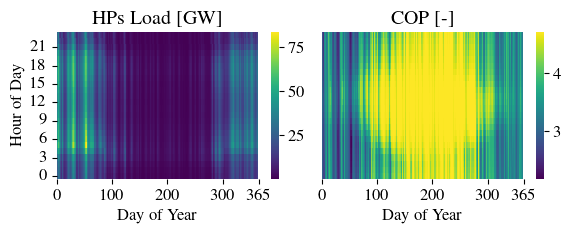

In [25]:
df_plot = pd.DataFrame()
title1 = "HPs Load [GW]"
title2 = "COP [-]"
df_plot[title1] = ts_heat_el
df_plot[title2] = scenario_dict["ts_cop"]
df_plot["Day of Year"] = df_plot.index.dayofyear
df_plot["Hour of Day"] = df_plot.index.hour
df_plot = df_plot.groupby(["Hour of Day", "Day of Year"]).mean().unstack()
figsize = (6, 2.5)
fig, ax =  plt.subplots(1, 2, figsize=figsize)
g = sns.heatmap(df_plot[title1], cmap='viridis', xticklabels=False, ax=ax[0],
                       cbar=True, linewidths=0)
g.invert_yaxis()
g = sns.heatmap(df_plot[title2], cmap='viridis', xticklabels=False, ax=ax[1],
                       cbar=True, linewidths=0)
g.invert_yaxis()
ax[1].set_ylabel("")
ax[1].set_yticks([])
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[1].set_xticks([0,100,200,300,365], [0,100,200,300,365])
ax[0].set_title(title1)
ax[1].set_title(title2)
plt.tight_layout()
fig.subplots_adjust(wspace=0.05)
plt.savefig("results/plots/paper_dc_hps_heatmap.pdf")

In [27]:
def get_years_dict(mode):
    if mode == "generation":
        years_dict = {
            "ego": [2011],
            "rn": [year for year in range(1980, 2020)]
        }
    elif mode == "demand":
        years_dict = {
            "ego": [2011],
            "entso": [year for year in range(2015, 2023)]
        }
    else:
        raise ValueError("mode not correct")
    return years_dict

In [28]:
base_values = base_scenario(vres_data_source="ego", year=2011)
vres_energy = base_values["ts_vres"].sum().sum()
solar_energy = base_values["ts_vres"].solar.sum()
print(f"ego-2011 has a share of {solar_energy/vres_energy*100}% solar.")
total_demand = base_values["ts_demand"].sum().sum()
print(f"ego-2011 has a total demand of {total_demand} GWh")

ego-2011 has a share of 28.177566872349658% solar.
ego-2011 has a total demand of 499299.467829801 GWh


In [29]:
mode = "demand"
years_dict = get_years_dict(mode)
demand = pd.DataFrame()
for data_source in years_dict.keys():
    for year in years_dict[data_source]:
        if mode == "generation":
            scenario_dict = base_scenario(vres_data_source=data_source, year=year)
        elif mode == "demand":
            scenario_dict = base_scenario(demand_data_source=data_source, year=year)
        else:
            raise ValueError("Mode not defined")
        scenario_dict = adjust_timeseries_data(scenario_dict)
        demand[f"{data_source}-{year}"] = scenario_dict["ts_demand"].sum(axis=1)
        total_demand = scenario_dict["ts_demand"].sum().sum()/1e3
        print(f"{data_source}-{year} has a total demand of {total_demand} TWh")

ego-2011 has a total demand of 499.299467829801 TWh
entso-2015 has a total demand of 499.0551382025 TWh
entso-2016 has a total demand of 500.60744001 TWh
entso-2017 has a total demand of 504.55102010249993 TWh
entso-2018 has a total demand of 507.990561775 TWh
entso-2019 has a total demand of 496.12208453500006 TWh
entso-2020 has a total demand of 482.852027665 TWh
entso-2021 has a total demand of 503.306908115 TWh
entso-2022 has a total demand of 482.5258484874999 TWh


In [30]:
mode = "generation"
years_dict = get_years_dict(mode)
if mode == "generation":
    years_dict = {
        "ego": [2011],
        "rn": [year for year in range(1980, 2020)]
    }
elif mode == "demand":
    years_dict = {
        "ego": [2011],
        "entso": [year for year in range(2015, 2023)]
    }
else:
    raise ValueError("mode not correct")
generation = pd.DataFrame()
for data_source in years_dict.keys():
    for year in years_dict[data_source]:
        if mode == "generation":
            scenario_dict = base_scenario(vres_data_source=data_source, year=year)
        elif mode == "demand":
            scenario_dict = base_scenario(demand_data_source=data_source, year=year)
        else:
            raise ValueError("Mode not defined")
        scenario_dict = adjust_timeseries_data(scenario_dict)
        generation[f"{data_source}-{year}"] = scenario_dict["ts_vres"].sum(axis=1)
        vres_energy = scenario_dict["ts_vres"].sum().sum()
        solar_energy = scenario_dict["ts_vres"].solar.sum()
        print(f"{data_source}-{year} has a share of {solar_energy/vres_energy*100}% solar.")

generation = generation.divide(generation.sum()).multiply(generation["ego-2011"].sum())

ego-2011 has a share of 28.177566872349658% solar.
rn-1980 has a share of 36.269435952764226% solar.
rn-1981 has a share of 35.633513918090856% solar.
rn-1982 has a share of 39.411474278118966% solar.
rn-1983 has a share of 34.135421532695844% solar.
rn-1984 has a share of 36.78515083216833% solar.
rn-1985 has a share of 38.217815036594246% solar.
rn-1986 has a share of 35.887289382618285% solar.
rn-1987 has a share of 38.53105983008977% solar.
rn-1988 has a share of 33.83630178370365% solar.
rn-1989 has a share of 38.03918832476544% solar.
rn-1990 has a share of 34.39580721004486% solar.
rn-1991 has a share of 38.909907660755906% solar.
rn-1992 has a share of 35.37821091153175% solar.
rn-1993 has a share of 36.51985634145944% solar.
rn-1994 has a share of 34.89848327296905% solar.
rn-1995 has a share of 36.104808872643204% solar.
rn-1996 has a share of 41.48347646289159% solar.
rn-1997 has a share of 39.332010856770935% solar.
rn-1998 has a share of 33.82034058745938% solar.
rn-1999 h

C:\Users\aheider\AppData\Local\Temp\ipykernel_27872\1325546983.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels([txt.get_text().replace("\n2011", "") for txt in axes[1].get_xticklabels("")])


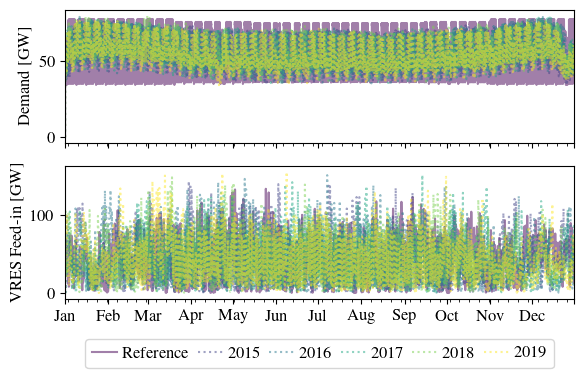

In [31]:
figsize = (6, 3.5)
fig, axes =  plt.subplots(2, 1, figsize=figsize)
demand[["ego-2011", "entso-2015", "entso-2016", "entso-2017", "entso-2018", "entso-2019"]].plot(
    ax=axes[0], style=["-",  ':' , ':',  ':' , ':' , ':',  ':'], alpha=0.5, cmap='viridis', legend=False)
axes[0].set_ylabel("Demand [GW]")
axes[0].set_xticklabels([])
generation[["ego-2011", "rn-2015", "rn-2016", "rn-2017", "rn-2018", "rn-2019"]].plot(
    ax=axes[1], style=["-",  ':' , ':',  ':' , ':' , ':',  ':'], alpha=0.5, cmap='viridis', legend=False)
axes[1].set_ylabel("VRES Feed-in [GW]")
axes[1].set_xticklabels([txt.get_text().replace("\n2011", "") for txt in axes[1].get_xticklabels("")])
plt.tight_layout()
axes[0].legend(["Reference", "2015", "2016", "2017", "2018", "2019"], ncols=6, loc="lower center", bbox_to_anchor=(0.5, -1.75),
               columnspacing=0.5, handletextpad=0.3, handlelength=1.5)
plt.savefig("results/plots/timeseries_variation.pdf", bbox_inches='tight')

# Results

In [33]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [34]:
def plot_storage_equivalent_germany_stacked(
        storage_equivalent,
        parameter={"scenario": "Deutschland"},
        ylabel="Gespeicherte Energie [GWh]",
        figsize=(5, 3),
        loc="upper left",
        ylim=None,
        language="english",
        save_dir=None,
        title=None,
        barwidth=None,
        ax=None,
        var="energy_stored"
):
    param = list(parameter.items())[0][0]
    xlabel = list(parameter.items())[0][1]
    
    
    if (language == "german") or (language == "deutsch"):
        type_dict = {0: "Kurz", 1: "Mittel", 2: "Land"}
    else:
        type_dict = {0: "Short", 1: "Medium", 2: "Long"}
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    colors = matplotlib.cm.get_cmap("Blues")
    for storage_type in range(storage_equivalent.storage_type.max()+1):
        plot_df = pd.DataFrame(index=storage_equivalent[param].unique())
        for val in storage_equivalent[param].unique():
            tmp = storage_equivalent.loc[(storage_equivalent[param] == val)&
                                        (storage_equivalent.storage_type >= storage_type)&
                                        (np.sign(storage_equivalent.energy_stored) == np.sign(storage_equivalent.loc[
                                            (storage_equivalent[param] == val)&
                                            (storage_equivalent.storage_type == storage_type), var
                                        ].values[0]))]
            plot_df.loc[val, ylabel] = tmp[var].sum()/1e3
        plot_df[xlabel] = storage_equivalent[param].unique()

        sns.barplot(x=xlabel, y=ylabel, color=colors(1.0-0.3*storage_type),
                    data=plot_df, ax=ax, label=type_dict[storage_type])
    if loc is not None:
        plt.legend(loc=loc)#loc="lower left"
    if barwidth is not None:
        change_width(ax, barwidth)
    if ylim is not None:
        # ax.get_ylim()
        ax.set_ylim(ylim)
    if param in ["nr_ev"]:
        xticklabels = ax.get_xticklabels()
        ax.set_xticklabels([int(float(tick.get_text())) for tick in xticklabels])
    if title is not None:
        plt.title(title)
    plt.tight_layout()
    if save_dir is not None:
        if "png" in save_dir:
            plt.savefig(save_dir, dpi=300)
        else:
            plt.savefig(save_dir)
    #plt.show()

In [155]:
def plot_storage_equivalent_germany_stacked_four(
        storage_equivalent_ref, storage_equivalent_flex, growth, diff,
        parameter={"scenario": "Deutschland"},
        ylabel="Stored Energy [TWh]",
        ylabel1="Change in Stored Energy [TWh]",
        figsize=(8, 6),
        ylim=None,
        language="english",
        loc="upper left",
        save_dir=None,
        titles = ["Reference Operation", "Optimised Operation", "Growth Reference Operation", "Reduction Optimised Operation"]
):
    param = list(parameter.items())[0][0]
    xlabel = list(parameter.items())[0][1]
    
    
    axes_dict = {(0,0): {"title": titles[0], "values": storage_equivalent_ref, "ylim": 0},
                (0,1): {"title": titles[1], "values": storage_equivalent_flex, "ylim": 1},
                (1,0): {"title": titles[2], "values": growth, "ylim": 2},
                (1,1): {"title": titles[3], "values": diff, "ylim": 3}}
    
    if (language == "german") or (language == "deutsch"):
        type_dict = {0: "Tag", 1: "Woche", 2: "Saisonal"}
    else:
        type_dict = {0: "Short", 1: "Medium", 2: "Long"}
    fig, axes = plt.subplots(2,2,figsize=figsize)
    colors = matplotlib.cm.get_cmap("Blues")
    for ax in axes_dict.keys():
        storage_equivalent = axes_dict[ax]["values"]
        for storage_type in range(storage_equivalent.storage_type.max()+1):

            plot_df = pd.DataFrame(index=storage_equivalent[param].unique())
            for val in storage_equivalent[param].unique():
                tmp = storage_equivalent.loc[(storage_equivalent[param] == val)&
                                            (storage_equivalent.storage_type >= storage_type)&
                                            (np.sign(storage_equivalent.energy_stored) == np.sign(storage_equivalent.loc[
                                                (storage_equivalent[param] == val)&
                                                (storage_equivalent.storage_type == storage_type), "energy_stored"
                                            ].values[0]))]
                plot_df.loc[val, ylabel] = tmp.energy_stored.sum()/1e3
            plot_df[xlabel] = storage_equivalent[param].unique()

            sns.barplot(x=xlabel, y=ylabel, color=colors(1.0-0.3*storage_type),
                        data=plot_df, ax=axes[ax], label=type_dict[storage_type])
        axes[ax].set_title(axes_dict[ax]["title"])
        if ax == (0,0):
            axes[ax].legend(loc=loc, columnspacing=0.5, handletextpad=0.3, handlelength=1.0,
                            borderpad=0.2)#loc="lower left"
        if ylim is not None:
            axes[ax].set_ylim(ylim[axes_dict[ax]["ylim"]])
        if (ax==(0,1)) or (ax==(1,1)):
            axes[ax].set_ylabel("")
        elif ax==(1,0):
            axes[ax].set_ylabel(ylabel1)
        if (ax==(0,0)) or (ax==(0,1)):
            axes[ax].set_xlabel("")
            axes[ax].set_xticks([])
        else:
            if param in ["nr_ev"]:
                xticklabels = axes[ax].get_xticklabels()
                axes[ax].set_xticklabels([int(float(tick.get_text())) for tick in xticklabels])
    plt.tight_layout()
    if save_dir is not None:
        if "png" in save_dir:
            plt.savefig(save_dir, dpi=300)
        else:
            plt.savefig(save_dir)
    return axes

In [71]:
def plot_storage_equivalent_germany_stacked_five(
        df_0, df_1, df_2, df_3, df_4,
        parameter={"scenario": "Deutschland"},
        ylabel="Stored Energy [TWh]",
        ylabel1="Change in Stored Energy [TWh]",
        figsize=(8, 9),
        ylim=None,
        language="english",
        loc="upper left",
        save_dir=None,
        titles = ["Reference Operation", "Optimised Operation", "Growth Reference Operation", "Reduction Optimised Operation", ""]
):
    param = list(parameter.items())[0][0]
    xlabel = list(parameter.items())[0][1]
    
    
    axes_dict = {(0,0): {"title": titles[0], "values": df_0, "ylim": 0},
                (0,1): {"title": titles[1], "values": df_1, "ylim": 1},
                (1,0): {"title": titles[2], "values": df_2, "ylim": 2},
                (1,1): {"title": titles[3], "values": df_3, "ylim": 3},
                (2,0): {"title": titles[4], "values": df_4, "ylim": 3}}
    
    if (language == "german") or (language == "deutsch"):
        type_dict = {0: "Tag", 1: "Woche", 2: "Saisonal"}
    else:
        type_dict = {0: "Short", 1: "Medium", 2: "Long"}
    fig, axes = plt.subplots(3,2,figsize=figsize)
    fig.delaxes(axes[(2,1)])
    colors = matplotlib.cm.get_cmap("Blues")
    for ax in axes_dict.keys():
        storage_equivalent = axes_dict[ax]["values"]
        for storage_type in range(storage_equivalent.storage_type.max()+1):

            plot_df = pd.DataFrame(index=storage_equivalent[param].unique())
            for val in storage_equivalent[param].unique():
                tmp = storage_equivalent.loc[(storage_equivalent[param] == val)&
                                            (storage_equivalent.storage_type >= storage_type)&
                                            (np.sign(storage_equivalent.energy_stored) == np.sign(storage_equivalent.loc[
                                                (storage_equivalent[param] == val)&
                                                (storage_equivalent.storage_type == storage_type), "energy_stored"
                                            ].values[0]))]
                plot_df.loc[val, ylabel] = tmp.energy_stored.sum()/1e3
            plot_df[xlabel] = storage_equivalent[param].unique()

            sns.barplot(x=xlabel, y=ylabel, color=colors(1.0-0.3*storage_type),
                        data=plot_df, ax=axes[ax], label=type_dict[storage_type])
        axes[ax].set_title(axes_dict[ax]["title"])
        if ax == (0,0):
            axes[ax].legend(loc=loc)#loc="lower left"
        if ylim is not None:
            axes[ax].set_ylim(ylim[axes_dict[ax]["ylim"]])
        if (ax==(0,1)) or (ax==(1,1)) or (ax==(1,2)):
            axes[ax].set_ylabel("")
        elif ax==(1,0):
            axes[ax].set_ylabel(ylabel1)
        if (ax==(0,0)) or (ax==(0,1)) or (ax==(1,0)):
            axes[ax].set_xlabel("")
            axes[ax].set_xticklabels([])
        else:
            if param in ["nr_ev"]:
                xticklabels = axes[ax].get_xticklabels()
                axes[ax].set_xticklabels([int(float(tick.get_text())) for tick in xticklabels])
    plt.tight_layout()
    if save_dir is not None:
        if "png" in save_dir:
            plt.savefig(save_dir, dpi=300)
        else:
            plt.savefig(save_dir)
    return axes

## Generation Mix

In [32]:
scenario = "Flat_Generation"
storage_equivalent_tmp = pd.read_csv(
        "results/two_weeks/{}/storage_equivalents.csv".format(scenario),
        index_col=0)
storage_equivalent_tmp["scenario"] = "Flat\nGen."
scenario = "Base_Case"
storage_equivalent_tmp_base = pd.read_csv(
        "results/two_weeks/{}/storage_equivalents.csv".format(scenario),
        index_col=0)
storage_equivalent_tmp_base["scenario"] = "100\%\nRES"
storage_equivalent_base = pd.concat([storage_equivalent_tmp, storage_equivalent_tmp_base], ignore_index=True)
storage_equivalent_base

,storage_type,energy_stored,nr_hp,nr_ev,scenario
0,0,41189.540061,0,0,Flat\nGen.
1,1,13389.337064,0,0,Flat\nGen.
2,2,1385.567288,0,0,Flat\nGen.
3,0,40476.138467,0,0,100\%\nRES
4,1,51279.081921,0,0,100\%\nRES
5,2,39725.808879,0,0,100\%\nRES


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


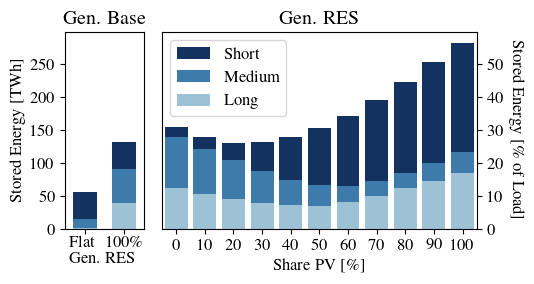

In [35]:
save_dir = "results/plots"
f, (a0, a1) = plt.subplots(1, 2, figsize=(5.5, 3), gridspec_kw={'width_ratios': [1, 4]})
title1 = "Gen. Base"
title2 = "Gen. RES"
parameter = {"scenario": "Scenario"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent_base,
            parameter=parameter,
            ylabel=ylabel,
            loc="upper left",
            language=language,
            ax=a0,
            ylim=(0,299),
            barwidth=0.6,
        )
scenario = "Variation_Generation"
storage_equivalent = pd.read_csv(
        "results/two_weeks/{}/storage_equivalents.csv".format(scenario),
        index_col=0)
parameter = {"share_pv": "Share PV [\%]"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent,
            parameter=parameter,
            ylabel=ylabel,
            loc="upper left",
            language=language,
            ax=a1,
            ylim=(0,299),
        )
a0.set_xlabel("")
a0.set_yticks([0, 50, 100, 150, 200, 250])
a1.set_yticks([0, 50, 100, 150, 200, 250])
a1.set_xticklabels([i*10 for i in range(11)])
a1.set_ylabel("Stored Energy [\% of Load]", rotation=270, labelpad=15)
a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
a1.yaxis.tick_right()
a1.set_yticklabels([int(tick/5) for tick in a1.get_yticks()])
a0.set_title(title1)
a1.set_title(title2)
plt.tight_layout()
#save_dir_tmp = os.path.join(save_dir, "storage_equivalent_generation.pdf")
#plt.savefig(save_dir_tmp)

In [37]:
naming_dict = {"0": "Short", "1": "Medium", "2": "Long"}
color_dict = {"Day": 0, "Week": 1, "Seasonal": 2}
colors = matplotlib.cm.get_cmap("Blues")
color_list = [colors(1.0-0.3*storage_type) for storage_type in [0,1,2]]
tf = pd.Series({
    "Short": pd.to_timedelta("24h"),
    "Medium": pd.to_timedelta("14d"),
    "Long": pd.to_timedelta("364d")
})
tf_num = pd.Series({
    "Short": pd.to_timedelta("24h")/pd.to_timedelta("1h"),
    "Medium": pd.to_timedelta("14d")/pd.to_timedelta("1h"),
    "Long": pd.to_timedelta("364d")/pd.to_timedelta("1h")
})
sd_df = pd.read_csv(os.path.join(r"results/two_weeks", scenario, "storage_durations.csv"), index_col=0, parse_dates=True)
for col in sd_df.columns:
    sd_df[col] = pd.to_timedelta(sd_df[col])
sd_df.rename(columns=naming_dict, inplace=True)
sd_df

,Short,Medium,Long
0.0,0 days 11:22:17.803923027,4 days 09:34:49.410391336,85 days 07:04:24.430335833
0.0,0 days 11:22:17.803923027,4 days 09:34:49.410391336,85 days 07:04:24.430335833
0.0,0 days 11:22:17.803923027,4 days 09:34:49.410391336,85 days 07:04:24.430335833
0.0,0 days 11:22:17.803923027,4 days 09:34:49.410391336,85 days 07:04:24.430335833
0.0,0 days 11:22:17.803923027,4 days 09:34:49.410391336,85 days 07:04:24.430335833
...,...,...,...
1.0,0 days 06:16:56.584609678,4 days 03:50:10.348783136,105 days 17:01:00.485806688
1.0,0 days 06:16:56.584609678,4 days 03:50:10.348783136,105 days 17:01:00.485806688
1.0,0 days 06:16:56.584609678,4 days 03:50:10.348783136,105 days 17:01:00.485806688
1.0,0 days 06:16:56.584609678,4 days 03:50:10.348783136,105 days 17:01:00.485806688


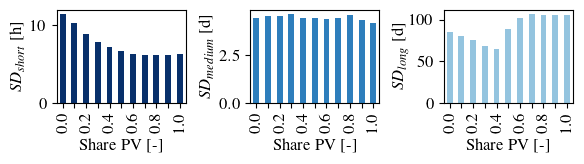

In [57]:
xlabel = "Share PV [-]"
ylabel1 = "$SD_{short}$ [h]"
ylabel2 = "$SD_{medium}$ [d]"
ylabel3 = "$SD_{long}$ [d]"
colors = matplotlib.cm.get_cmap("Blues")
color_list = [colors(1.0-0.3*storage_type) for storage_type in [0,1,2]]
figsize = (6, 1.8)
fig, ax =  plt.subplots(1, 3, figsize=figsize)
sd_df["Short"].groupby(level=0).mean().divide(pd.to_timedelta("1h")).plot.bar(
    ax=ax[0], color=color_list[0], xlabel=xlabel, ylabel=ylabel1)
ax[0].set_xticklabels([0.0, "", 0.2, "", 0.4, "", 0.6, "", 0.8, "", 1.0])
#ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)
sd_df["Medium"].groupby(level=0).mean().divide(pd.to_timedelta("1d")).plot.bar(
    ax=ax[1], color=color_list[1], xlabel=xlabel, ylabel=ylabel2)
ax[1].set_xticklabels([0.0, "", 0.2, "", 0.4, "", 0.6, "", 0.8, "", 1.0])
#ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)
sd_df["Long"].groupby(level=0).mean().divide(pd.to_timedelta("1d")).plot.bar(
    ax=ax[2], color=color_list[2], xlabel=xlabel, ylabel=ylabel3)
ax[2].set_xticklabels([0.0, "", 0.2, "", 0.4, "", 0.6, "", 0.8, "", 1.0])
ax[2].set_yticks([0,50,100])
#ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=0)
plt.tight_layout()
fig.subplots_adjust(wspace=0.5)
ax[2].yaxis.set_label_coords(-0.27, 0.5)
plt.savefig("results/plots/paper_dc_storage_durations.pdf")

## SC Integration

In [59]:
def load_scenarios_and_diff(scenario_ref, scenario_flex, variation_parameter, res_dir="results/two_weeks"):
    """
    Method to load storage equivalents of reference (inflexible) and flexible scenario and calculate 
    growth for reference scneario and difference between reference and flexible scenario.
    """
    # load reference scenario
    storage_equivalent_ref = pd.read_csv(
        f"{res_dir}/{scenario_ref}/storage_equivalents.csv",
        index_col=0).reset_index().drop(columns="index")
    # calculate growth
    growth = storage_equivalent_ref.copy()
    ref = storage_equivalent_ref.loc[getattr(storage_equivalent_ref, variation_parameter) == 0]
    for val in getattr(storage_equivalent_ref, variation_parameter).unique():
        tmp = storage_equivalent_ref.loc[getattr(storage_equivalent_ref, variation_parameter) == val]
        growth.loc[tmp.index, "energy_stored"] = \
            tmp["energy_stored"].values-ref["energy_stored"].values
    # load flexible scenario
    storage_equivalent_flex = pd.read_csv(
        f"{res_dir}/{scenario_flex}/storage_equivalents.csv",
        index_col=0).reset_index().drop(columns="index")
    # calculate difference between flexible and reference operation
    diff = storage_equivalent_flex.copy()
    diff["energy_stored"] = storage_equivalent_flex["energy_stored"] - \
                            storage_equivalent_ref["energy_stored"]
    return storage_equivalent_ref, growth, storage_equivalent_flex, diff

In [72]:
def get_relative_storage_equivalent(df, var, energy_ref):
    df_percent = df.copy()
    df_percent[var] = df_percent[var].divide(energy_ref).multiply(100)
    return df_percent

In [83]:
def load_diff_single_storage_types(scenario_reference, scenarios_flex, var, res_dir="results/two_weeks"):
    diffs = {}
    for scenario_flex in scenarios_flex:
        diff = pd.DataFrame()
        for storage_type in range(3):
            scenario_flex_tmp = "_".join([scenario_flex, str(storage_type)])
            storage_equivalent_ref, growth, storage_equivalent_flex, diff_tmp=load_scenarios_and_diff(
                scenario_reference, scenario_flex_tmp, var, res_dir)
            diff = pd.concat([diff, diff_tmp], ignore_index=True)
        diff = diff.groupby([var, "storage_type"]).sum().reset_index()
        diffs[scenario_flex] = diff
    return storage_equivalent_ref, growth, diffs

## Electric Vehicles

In [129]:
res_dir = r"H:\Flexibility-Quantification\final_run_paper_v1"
flexible_scenarios = ["EV_flexible", "EV_flexible_with_public", "EV_flexible_with_shifting", "EV_flexible_with_v2g"]
var = "nr_ev"
storage_equivalent_ref, growth, storage_equivalent_flex, diff=load_scenarios_and_diff("EV_reference", flexible_scenarios[0], var, res_dir=res_dir)
storage_equivalent_ref, growth, storage_equivalent_flex_2, diff_2=load_scenarios_and_diff("EV_reference", flexible_scenarios[1], var, res_dir=res_dir)
storage_equivalent_ref, growth, storage_equivalent_flex_3, diff_3=load_scenarios_and_diff("EV_reference", flexible_scenarios[2], var, res_dir=res_dir)
storage_equivalent_ref, growth, storage_equivalent_flex_4, diff_4=load_scenarios_and_diff("EV_reference", flexible_scenarios[3], var, res_dir=res_dir)

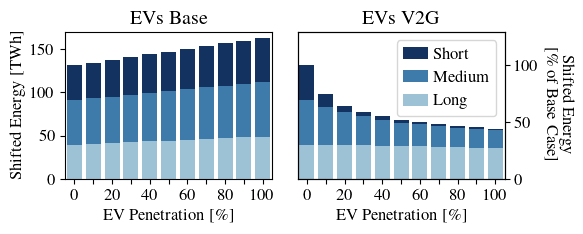

In [130]:
# plot reference and V2G
save_dir = "results/plots"
parameter = {"nr_ev": "Number EVs [Mio.]"}
ylabel = "Shifted Energy [TWh]"
language = "english"
fig, axes = plt.subplots(1, 2, figsize=(6,2.5))
save_dir_tmp = os.path.join(save_dir, "paper_dc_storage_equivalent_EVs_double.pdf")
ax = axes[0]
plot_storage_equivalent_germany_stacked(
            storage_equivalent_ref,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language,
            ax=ax,
            title="EVs Base"
        )
ax = axes[1]
plot_storage_equivalent_germany_stacked(
            storage_equivalent_flex_4,
            parameter=parameter,
            ylabel=ylabel,
            loc="upper right",
            language=language,
            ax=ax,
            title="EVs V2G"
        )
axes[0].set_title("EVs Base")
for ax in axes:
    ax.set_xlabel("EV Penetration [\%]")
    #ax.set_xticklabels([10*i for i in range(11)])
    ax.set_xticklabels([0, "", 20, "", 40, "", 60, "", 80, "", 100 ])
    ax.set_ylim(0,170)
ax = axes[1]
axes[1].legend(columnspacing=0.5, handletextpad=0.3, handlelength=1.5)
a1 = ax.twinx()
a1.set_ylim(ax.get_ylim())
a1.set_ylabel("~~Shifted Energy \n[\% of Base Case]", rotation=270, labelpad=25)
a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
ax.set_ylabel("")
ax.set_yticks([])
energy_ref = storage_equivalent_ref.groupby("nr_ev").sum().loc[0, "energy_stored"]/1e3
a1.set_yticks([0, energy_ref/2, energy_ref])
a1.set_yticklabels([0, 50, 100])
plt.tight_layout()
#ax.legend(ncols=3, loc="upper left", columnspacing=0.5, handletextpad=0.3, handlelength=1.5)
plt.savefig(save_dir_tmp)

In [73]:
growth_rel = get_relative_storage_equivalent(growth, "energy_stored", energy_ref)
diff_rel = get_relative_storage_equivalent(diff, "energy_stored", energy_ref)
diff_2_rel = get_relative_storage_equivalent(diff_2, "energy_stored", energy_ref)
diff_3_rel = get_relative_storage_equivalent(diff_3, "energy_stored", energy_ref)
diff_4_rel = get_relative_storage_equivalent(diff_4, "energy_stored", energy_ref)

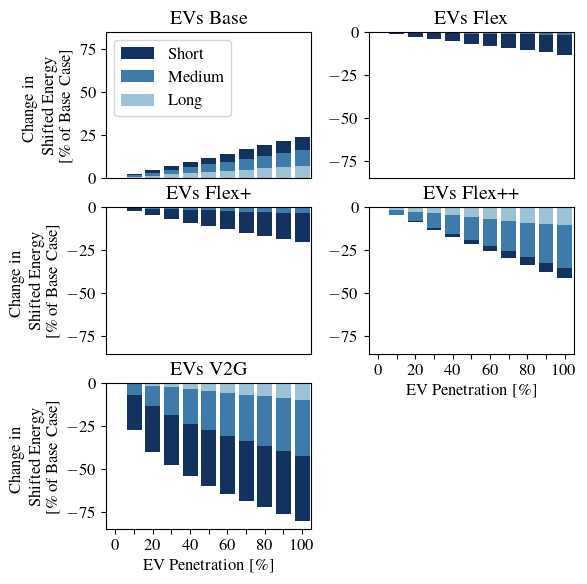

In [80]:
parameter = {"nr_ev": "Number EVs [Mio.]"}
ylabel = "~~~~~Change in\n~~Shifted Energy\n[\% of Base Case]"
language = "english"
save_dir_tmp = os.path.join(save_dir, "paper_dc_storage_equivalent_EVs_flex.pdf")
ylim = 85
ylim_neg = 0
axes=plot_storage_equivalent_germany_stacked_five(growth_rel, diff_rel, diff_2_rel, diff_3_rel, diff_4_rel,
                                             parameter=parameter,
                                             ylabel=ylabel,
                                             ylabel1=ylabel,
                                             ylim=[(-ylim_neg, ylim), (-ylim, ylim_neg), (-ylim, ylim_neg), (-ylim, ylim_neg)],
                                             titles=["EVs Base", "EVs Flex", "EVs Flex+", "EVs Flex++", "EVs V2G"],
                                             #save_dir=save_dir_tmp,
                                                 figsize=(6,6))
plt.subplots_adjust(hspace=0.2)
for ax in [axes[(2,0)], axes[(1,1)]]:
    ax.set_xlabel("EV Penetration [\%]")
    ax.set_xticklabels([0, "", 20, "", 40, "", 60, "", 80, "", 100 ])
for ax in [axes[(0,0)], axes[(0,1)], axes[(1,0)]]:
    ax.set_xticks([])
plt.savefig(save_dir_tmp)

In [86]:
scatter_df_total = pd.DataFrame()
x = "Level of Flexibility"
var = "energy_stored"
# initialise scatter df total
tmp = growth.groupby("nr_ev").sum()
tmp[var] = 0
tmp[x] = 0
scatter_df_total = pd.concat([scatter_df_total, tmp])
# iterate through flexibility scenarios
flexibility_levels = [1,2,3,4]
diff_dfs = [diff, diff_2, diff_3, diff_4]
ref = storage_equivalent_ref.groupby("nr_ev").sum()
for fl, diff_df in zip(flexibility_levels, diff_dfs):
    tmp = diff_df.groupby("nr_ev").sum()
    tmp[var] = tmp[var].divide(ref[var])*100
    tmp[x] = fl
    scatter_df_total = pd.concat([scatter_df_total, tmp])

In [88]:
var="nr_ev"
res_dir = r"C:\Users\aheider\Documents\Software\Flexibility-Quantification\results\final_run_paper_v1"
scenarios = ["EV_flexible_reduction", "EV_flexible_with_public_reduction", "EV_flexible_with_shifting_reduction", 
             "EV_flexible_with_v2g_reduction"]
tmp = load_diff_single_storage_types(
    "EV_reference", scenarios, var, res_dir=res_dir)
diff_rel = tmp[2][scenarios[0]]
diff_rel["energy_stored"] = diff_rel["energy_stored"].divide(storage_equivalent_ref.reset_index()["energy_stored"])*1e5
diff_rel_2 = tmp[2][scenarios[1]]
diff_rel_2["energy_stored"] = diff_rel_2["energy_stored"].divide(storage_equivalent_ref.reset_index()["energy_stored"])*1e5
diff_rel_3 = tmp[2][scenarios[2]]
diff_rel_3["energy_stored"] = diff_rel_3["energy_stored"].divide(storage_equivalent_ref.reset_index()["energy_stored"])*1e5
diff_rel_4 = tmp[2][scenarios[3]]
diff_rel_4["energy_stored"] = diff_rel_4["energy_stored"].divide(storage_equivalent_ref.reset_index()["energy_stored"])*1e5

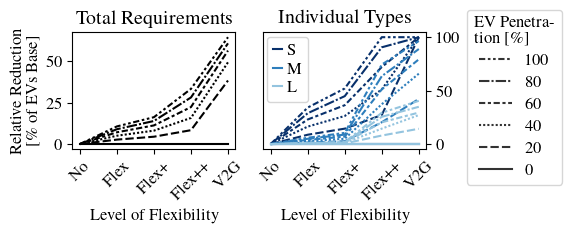

In [136]:
type_dict = {0: "Short", 1: "Medium", 2: "Long"}
x = "Level of Flexibility"
y = "Relative Reduction\n~~[\% of EVs Base]"
# set initial point

df_scatter_plt = diff_rel.copy()
df_scatter_plt[x] = 0
df_scatter_plt[y] = 0
# get values flexibility scenarios
diffs = [diff_rel, diff_rel_2, diff_rel_3, diff_rel_4]
sizes_tes = [1, 2, 3, 4]
for diff_df, size_tes in zip(diffs, sizes_tes):
    tmp=diff_df.copy()
    tmp[x] = size_tes
    tmp[y] = tmp["energy_stored"].abs()/1e3
    df_scatter_plt = pd.concat([df_scatter_plt, tmp], ignore_index=True)

    
param = "nr_ev"
hue = "Storage Type"
colors = matplotlib.cm.get_cmap("Blues")
fig, axes = plt.subplots(1, 2, figsize=(6,2.5))

# subplot 1
ax = axes[0]
df_plot = scatter_df_total.rename(columns={"energy_stored":y}).loc[[i*2*4.88 for i in range(6)]]#.loc[df_scatter_plt[param] == val] 
sns.lineplot(data=df_plot.abs(), x=x, y=y, style=param, ax=ax, color="k")
ax.legend().remove()
ax.set_xticks([0,1,2,3, 4], ["No", "Flex", "Flex+", "Flex++", "V2G"], rotation=45)
ax.set_title("Total Requirements")

# subplot 2
ax = axes[1]
color_list = [colors(1.0-0.3*storage_type) for storage_type in [0,1,2]]
df_scatter_plt[hue] = df_scatter_plt.storage_type.apply(lambda x: type_dict[x])
df_plot = df_scatter_plt.loc[df_scatter_plt[param].isin([i*2*4.88 for i in range(6)])]#.loc[df_scatter_plt[param] == val] 
sns.lineplot(data=df_plot, x=x, y=y, hue=hue, style=param, palette=color_list, ax=ax)
handles, labels = ax.get_legend_handles_labels()
leg = plt.legend(handles[1:4], ["S", "M", "L"], loc="upper left",# title="Storage Type", 
                 columnspacing=0.5, labelspacing=0.2, handletextpad=0.3, handlelength=0.5,
                    bbox_to_anchor=(-0.03, 1.03))
ax.add_artist(leg)
plt.legend(handles=reversed(handles[5:]), labels=reversed([int((float(l)+0.1)/0.488) for l in labels[5:]]),loc=(1.25,-0.0), 
           title="EV Penetra-\ntion [\%]", labelspacing=0.4)
ax.set_xticks([0,1,2,3, 4], ["No", "Flex", "Flex+", "Flex++", "V2G"], rotation=45)
ax.set_ylabel("")
ax.yaxis.tick_right()
ax.set_title("Individual Types")
plt.tight_layout()
plt.legend(handles=reversed(handles[5:]), labels=reversed([int((float(l)+0.1)/0.488) for l in labels[5:]]),loc=(1.25,-0.3), 
           title="EV Penetra-\ntion [\%]", labelspacing=0.4)
plt.savefig("results/plots/paper_dc_reduction_potential_evs_both.pdf", bbox_inches='tight')

## Heat Pumps

In [139]:
res_dir = r"C:\Users\aheider\Documents\Software\Flexibility-Quantification\results\final_run_paper_v1"
flexible_scenarios = ["HP_flexible", "HP_flexible_double_TES", "HP_flexible_four_TES"]
var = "nr_hp"
storage_equivalent_ref, growth, storage_equivalent_flex, diff=load_scenarios_and_diff("HP_reference", flexible_scenarios[0], var, res_dir=res_dir)
storage_equivalent_ref, growth, storage_equivalent_flex_2, diff_2=load_scenarios_and_diff("HP_reference", flexible_scenarios[1], var, res_dir=res_dir)
storage_equivalent_ref, growth, storage_equivalent_flex_3, diff_3=load_scenarios_and_diff("HP_reference", flexible_scenarios[2], var, res_dir=res_dir)

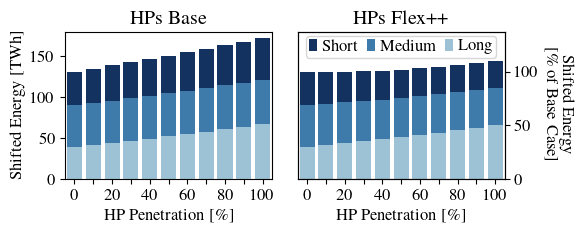

In [140]:
# plot reference and V2G
save_dir = "results/plots"
parameter = {"nr_hp": "Number HPs [Mio.]"}
ylabel = "Shifted Energy [TWh]"
language = "english"
fig, axes = plt.subplots(1, 2, figsize=(6,2.5))
save_dir_tmp = os.path.join(save_dir, "paper_dc_storage_equivalent_HPs_double.pdf")
ax = axes[0]
plot_storage_equivalent_germany_stacked(
            storage_equivalent_ref,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language,
            ax=ax,
            title="HPs Base"
        )
ax = axes[1]
plot_storage_equivalent_germany_stacked(
            storage_equivalent_flex_3,
            parameter=parameter,
            ylabel=ylabel,
            loc="upper right",
            language=language,
            ax=ax,
            title="HPs Flex++"
        )
axes[0].set_title("HPs Base")
for ax in axes:
    ax.set_xlabel("HP Penetration [\%]")
    ax.set_xticklabels([0, "", 20, "", 40, "", 60, "", 80, "", 100 ])
    ax.set_ylim(0,180)
ax = axes[1]
a1 = ax.twinx()
a1.set_ylim(ax.get_ylim())
a1.set_ylabel("~~Shifted Energy \n[\% of Base Case]", rotation=270, labelpad=25)
a1.yaxis.set_label_position("right")
a1.yaxis.tick_right()
ax.set_ylabel("")
ax.set_yticks([])
energy_ref = storage_equivalent_ref.groupby("nr_hp").sum().loc[0, "energy_stored"]/1e3
a1.set_yticks([0, energy_ref/2, energy_ref])
a1.set_yticklabels([0, 50, 100])
plt.tight_layout()
ax.legend(ncols=3, loc="upper center", columnspacing=0.5, handletextpad=0.3, handlelength=0.5,
         bbox_to_anchor=(0.5, 1.03), borderpad=0.2)
#ax.legend(ncols=3, loc=(-0.55, -0.4), columnspacing=0.5)
#plt.legend(ncols=3, loc=(-0.2, 0.5))
plt.savefig(save_dir_tmp, bbox_inches='tight')

In [141]:
growth_rel = get_relative_storage_equivalent(growth, "energy_stored", energy_ref)
diff_rel = get_relative_storage_equivalent(diff, "energy_stored", energy_ref)
diff_2_rel = get_relative_storage_equivalent(diff_2, "energy_stored", energy_ref)
diff_3_rel = get_relative_storage_equivalent(diff_3, "energy_stored", energy_ref)

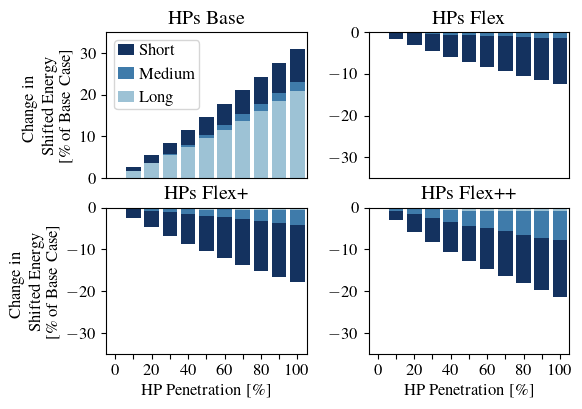

In [156]:
ylabel = "~~~~~Change in\n~~Shifted Energy\n[\% of Base Case]"
language = "english"
save_dir_tmp = os.path.join(save_dir, "paper_dc_storage_equivalent_HPs_flex.pdf")
axes = plot_storage_equivalent_germany_stacked_four(growth_rel, diff_rel, diff_2_rel, diff_3_rel,
                                                    parameter=parameter,
                                                    ylabel=ylabel,
                                                    ylabel1=ylabel,
                                                    ylim=[(0.0, 35), (-35, 0), (-35, 0), (-35, 0)],
                                                    titles=["HPs Base", "HPs Flex", "HPs Flex+", "HPs Flex++"],
                                                    figsize=(6, 4.25))
#axes[(0,0)].legend().remove()
#axes[(1,0)].legend(loc="lower left")
plt.subplots_adjust(hspace=0.2)
for ax in [axes[(1,0)], axes[(1,1)]]:
    ax.set_xlabel("HP Penetration [\%]")
    ax.set_xticklabels([0, "", 20, "", 40, "", 60, "", 80, "", 100 ])
plt.savefig(save_dir_tmp)

In [157]:
scatter_df_total = pd.DataFrame()
x = "Level of Flexibility"
var = "energy_stored"
# initialise scatter df total
tmp = growth.groupby("nr_hp").sum()
tmp[var] = 0
tmp[x] = 0
scatter_df_total = pd.concat([scatter_df_total, tmp])
# iterate through flexibility scenarios
flexibility_levels = [1,2,4]
diff_dfs = [diff, diff_2, diff_3]
ref = storage_equivalent_ref.groupby("nr_hp").sum()
for fl, diff_df in zip(flexibility_levels, diff_dfs):
    tmp = diff_df.groupby("nr_hp").sum()
    tmp[var] = tmp[var].divide(ref[var])*100
    tmp[x] = fl
    scatter_df_total = pd.concat([scatter_df_total, tmp])

In [161]:
var="nr_hp"
scenarios = ["HP_flexible_reduction", "HP_flexible_double_TES_reduction", "HP_flexible_four_TES_reduction"]
tmp = load_diff_single_storage_types("HP_reference", scenarios, var, res_dir)
diff_rel = tmp[2][scenarios[0]]
diff_rel["energy_stored"] = diff_rel["energy_stored"].divide(storage_equivalent_ref.reset_index()["energy_stored"])*1e5
diff_rel_2 = tmp[2][scenarios[1]]
diff_rel_2["energy_stored"] = diff_rel_2["energy_stored"].divide(storage_equivalent_ref.reset_index()["energy_stored"])*1e5
diff_rel_3 = tmp[2][scenarios[2]]
diff_rel_3["energy_stored"] = diff_rel_3["energy_stored"].divide(storage_equivalent_ref.reset_index()["energy_stored"])*1e5

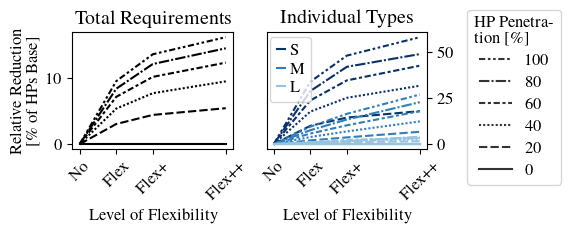

In [174]:
type_dict = {0: "Short", 1: "Medium", 2: "Long"}
x = "Level of Flexibility"
y = "Relative Reduction\n~~[\% of HPs Base]"
# set initial point

df_scatter_plt = diff_rel.copy()
df_scatter_plt[x] = 0
df_scatter_plt[y] = 0
# get values flexibility scenarios
diffs = [diff_rel, diff_rel_2, diff_rel_3]
sizes_tes = [1, 2, 4]
for diff_df, size_tes in zip(diffs, sizes_tes):
    tmp=diff_df.copy()
    tmp[x] = size_tes
    tmp[y] = tmp["energy_stored"].abs()/1e3
    df_scatter_plt = pd.concat([df_scatter_plt, tmp], ignore_index=True)

    
param = "nr_hp"
hue = "Storage Type"
colors = matplotlib.cm.get_cmap("Blues")
fig, axes = plt.subplots(1, 2, figsize=(6,2.5))

# subplot 1
ax = axes[0]
df_plot = scatter_df_total.rename(columns={"energy_stored":y}).loc[[i*2*1.94 for i in range(6)]]#.loc[df_scatter_plt[param] == val] 
sns.lineplot(data=df_plot.abs(), x=x, y=y, style=param, ax=ax, color="k")
ax.legend().remove()
ax.set_xticks([0,1,2, 4], ["No", "Flex", "Flex+", "Flex++"], rotation=45)
ax.set_title("Total Requirements")

# subplot 2
ax = axes[1]
color_list = [colors(1.0-0.3*storage_type) for storage_type in [0,1,2]]
df_scatter_plt[hue] = df_scatter_plt.storage_type.apply(lambda x: type_dict[x])
df_plot = df_scatter_plt.loc[df_scatter_plt.nr_hp.isin([i*2*1.94 for i in range(6)])]#.loc[df_scatter_plt[param] == val] 
sns.lineplot(data=df_plot, x=x, y=y, hue=hue, style=param, palette=color_list, ax=ax)
handles, labels = ax.get_legend_handles_labels()
leg = plt.legend(handles[1:4], ["S", "M", "L"], loc="upper left",# title="Storage Type", 
                 columnspacing=0.5, labelspacing=0.2, handletextpad=0.3, handlelength=0.5,
                    bbox_to_anchor=(-0.03, 1.03))
ax.add_artist(leg)
plt.legend(handles=reversed(handles[5:]), labels=reversed([int((float(l)+0.1)/0.194) for l in labels[5:]]),loc=(1.25,-0.0), 
           title="HP Penetra-\ntion [\%]", labelspacing=0.4)
ax.set_xticks([0,1,2, 4], ["No", "Flex", "Flex+", "Flex++"], rotation=45)
ax.set_ylabel("")
ax.yaxis.tick_right()
ax.set_title("Individual Types")
plt.tight_layout()
plt.legend(handles=reversed(handles[5:]), labels=reversed([int((float(l)+0.1)/0.194) for l in labels[5:]]),loc=(1.25,-0.3), 
           title="HP Penetra-\ntion [\%]", labelspacing=0.4)
plt.savefig("results/plots/paper_dc_reduction_potential_hps_both.pdf", bbox_inches='tight')

## Sensitivity

In [176]:
scenario = "Sensitivity_Weights"
res_dir_base = r"H:\Flexibility-Quantification\final_run_paper_v1"
storage_equivalent = pd.read_csv(
        f"{res_dir_base}/{scenario}/storage_equivalents.csv",
        index_col=0)
scenario = "Sensitivity_Weights_HP_max_flex"
storage_equivalent_hp_max_flex = pd.read_csv(
        f"{res_dir_base}/{scenario}/storage_equivalents.csv",
        index_col=0)
scenario = "Sensitivity_Weights_EV_max_flex"
storage_equivalent_ev_max_flex = pd.read_csv(
        f"{res_dir_base}/{scenario}/storage_equivalents.csv",
        index_col=0)

In [178]:
def plot_storage_equivalent_germany_stacked_three(
        storage_equivalent_1, storage_equivalent_2, storage_equivalent_3, 
        parameter={"scenario": "Deutschland"},
        ylabel="Stored Energy [TWh]",
        figsize=(8, 2.5),
        ylim=None,
        language="english",
        loc="upper left",
        save_dir=None,
        titles = ["Base Case", "With 40 Mio. EVs", "With 20 Mio. HPs"]
):
    param = list(parameter.items())[0][0]
    xlabel = list(parameter.items())[0][1]
    
    
    axes_dict = {0: {"title": titles[0], "values": storage_equivalent_1},
                1: {"title": titles[1], "values": storage_equivalent_2},
                2: {"title": titles[2], "values": storage_equivalent_3},}
    
    if (language == "german") or (language == "deutsch"):
        type_dict = {0: "Kurz", 1: "Mittel", 2: "Land"}
    else:
        type_dict = {0: "Short", 1: "Medium", 2: "Long"}
    fig, axes = plt.subplots(1,3,figsize=figsize)
    colors = matplotlib.cm.get_cmap("Blues")
    for ax in axes_dict.keys():
        storage_equivalent = axes_dict[ax]["values"]
        for storage_type in range(storage_equivalent.storage_type.max()+1):

            plot_df = pd.DataFrame(index=storage_equivalent[param].unique())
            for val in storage_equivalent[param].unique():
                tmp = storage_equivalent.loc[(storage_equivalent[param] == val)&
                                            (storage_equivalent.storage_type >= storage_type)&
                                            (np.sign(storage_equivalent.energy_stored) == np.sign(storage_equivalent.loc[
                                                (storage_equivalent[param] == val)&
                                                (storage_equivalent.storage_type == storage_type), "energy_stored"
                                            ].values[0]))]
                plot_df.loc[val, ylabel] = tmp.energy_stored.sum()/1e3
            plot_df[xlabel] = storage_equivalent[param].unique()

            sns.barplot(x=xlabel, y=ylabel, color=colors(1.0-0.3*storage_type),
                        data=plot_df, ax=axes[ax], label=type_dict[storage_type])
        axes[ax].set_title(axes_dict[ax]["title"])
        if (ax == 0) & (loc is not None):
            axes[ax].legend(loc=loc, ncols=3)#loc="lower left"
        if ylim is not None:
            axes[ax].set_ylim(ylim)
        if (ax==1) or (ax==2):
            axes[ax].set_ylabel("")
        elif ax==0:
            axes[ax].set_ylabel(ylabel)
        else:
            if param in ["nr_ev"]:
                xticklabels = axes[ax].get_xticklabels()
                axes[ax].set_xticklabels([int(float(tick.get_text())) for tick in xticklabels])
    plt.tight_layout()
    if save_dir is not None:
        if "png" in save_dir:
            plt.savefig(save_dir, dpi=300)
        else:
            plt.savefig(save_dir)
    return axes

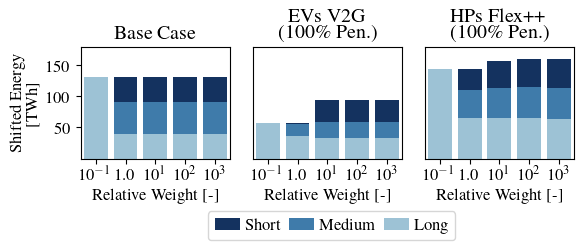

In [213]:

import itertools
def flip(items, ncol):
    return itertools.chain(*[items[i::ncol] for i in range(ncol)])
save_dir = "results/plots"
parameter = {"relative_weight": "Relative Weight [-]"}
ylabel = "Shifted Energy\n~~~~~~[TWh]"
language = "english"
rename_dict={0.1: "$10^{-1}$", 10: "$10^{1}$", 100: "$10^{2}$", 1000: "$10^{3}$"}
save_dir_tmp = os.path.join(save_dir, "paper_dc_sensitivity_weights.pdf")
axes=plot_storage_equivalent_germany_stacked_three(
    storage_equivalent.replace(rename_dict), storage_equivalent_ev_max_flex.replace(rename_dict), 
    storage_equivalent_hp_max_flex.replace(rename_dict),
    parameter=parameter,
    ylabel=ylabel,
    loc=None,
    language=language,
    ylim=(0, 180),
    titles = ["Base Case", "~~EVs V2G \n(100\% Pen.)", "HPs Flex++ \n(100\% Pen.)"],
    figsize=(6, 2.3)
)
axes[0].set_yticks([50, 100, 150])
axes[1].set_yticks([])
axes[2].set_yticks([])
plt.tight_layout()
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels,  ncols=3, loc=(-0.3,-0.73), 
               columnspacing=0.5, handletextpad=0.3, handlelength=1.5)
plt.savefig(save_dir_tmp, bbox_inches='tight')

In [201]:
res_dir = r"C:\Users\aheider\Documents\Software\Flexibility-Quantification\results\two_weeks"
scenario = "Variation_Generation_years"
storage_equivalent_gen = pd.read_csv(
        f"{res_dir}/{scenario}/storage_equivalents.csv",
        index_col=0)
storage_equivalent_gen.loc[storage_equivalent_gen.data_source=="ego", "year"] = "ref."
scenario = "Variation_Load_years"
storage_equivalent_demand = pd.read_csv(
        f"{res_dir}/{scenario}/storage_equivalents.csv",
        index_col=0)
storage_equivalent_demand.loc[storage_equivalent_demand.data_source=="ego", "year"] = "ref."

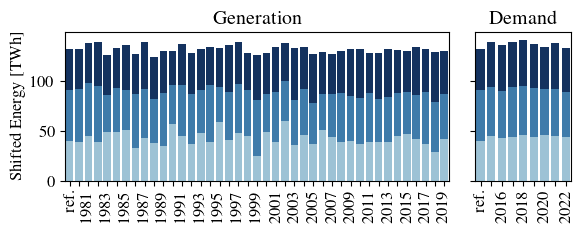

In [212]:
save_dir = "results/plots"
f, (a0, a1) = plt.subplots(1, 2, figsize=(6, 2.5), gridspec_kw={'width_ratios': [4, 1]})
parameter = {"year": "Year"}
ylabel = "Shifted Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent_gen,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language,
            ax=a0,
            ylim=(0,149)
        )
parameter = {"year": "Year"}
ylabel = "Stored Energy [TWh]"
language = "english"
plot_storage_equivalent_germany_stacked(
            storage_equivalent_demand,
            parameter=parameter,
            ylabel=ylabel,
            loc=None,
            language=language,
            ax=a1,
            ylim=(0,149)
        )
a0.set_xlabel("")
a1.set_xlabel("")
a0.set_title("Generation")
a1.set_title("Demand")
a1.set_ylabel("")
a1.set_yticklabels([])
a0.set_xticklabels(a0.get_xticklabels(), rotation=90)
n = 2  
[l.set_visible(False) for (i,l) in enumerate(a0.xaxis.get_ticklabels()) if i % n != 0]
a1.set_xticklabels(a1.get_xticklabels(), rotation=90)
[l.set_visible(False) for (i,l) in enumerate(a1.xaxis.get_ticklabels()) if i % n != 0]
plt.tight_layout()
save_dir_tmp = os.path.join(save_dir, "paper_dc_storage_equivalent_variation_years.pdf")
plt.savefig(save_dir_tmp)

# Discussion

In [214]:
colors_sns = sns.color_palette("Paired")
colors_sns
colors_blue = matplotlib.cm.get_cmap("Blues")
def get_colors(df):
    colors = {}
    for idx in df.index:
        if idx != "Own Value":
            colors[idx] = colors_blue(0.5)
        else:
            colors[idx] = colors_sns[6]#"#ff7f0e"
    return colors

In [215]:
energy_ev_comparison = pd.DataFrame(columns=["electricity consumption", "nr_ev_mio"])
energy_ev_comparison.loc["Own Value", "electricity consumption"] = 89.6967
energy_ev_comparison.loc["Own Value", "nr_ev_mio"] = 40
energy_ev_comparison.loc["~ Kemmler\net al. (2022)", "electricity consumption"] = 70
energy_ev_comparison.loc["~ Kemmler\net al. (2022)", "nr_ev_mio"] = 18.2
energy_ev_comparison.loc["Pehnt et\nal. (2011)", "electricity consumption"] = 18
energy_ev_comparison.loc["Pehnt et\nal. (2011)", "nr_ev_mio"] = 12
energy_ev_comparison.loc["~Kühnbach\net al. (2020)", "electricity consumption"] = 2.9
energy_ev_comparison.loc["~Kühnbach\net al. (2020)", "nr_ev_mio"] = 1
energy_ev_comparison.loc["Brown et\nal. (2018)", "electricity consumption"] = 1075
energy_ev_comparison.loc["Brown et\nal. (2018)", "nr_ev_mio"] = 246

energy_ev_comparison["relative consumption"] = energy_ev_comparison["electricity consumption"]/energy_ev_comparison["nr_ev_mio"]

In [216]:
energy_hp_comparison = pd.DataFrame(columns=["electricity consumption", "nr_hp_mio"])
energy_hp_comparison.loc["Own Value", "electricity consumption"] = 123.822
energy_hp_comparison.loc["Own Value", "nr_hp_mio"] = 20
energy_hp_comparison.loc["~ Kemmler\net al. (2022)", "electricity consumption"] = 33
energy_hp_comparison.loc["~ Kemmler\net al. (2022)", "nr_hp_mio"] = 5.5
energy_hp_comparison.loc["Barton et\nal. (2022)", "electricity consumption"] = 15.6
energy_hp_comparison.loc["Barton et\nal. (2022)", "nr_hp_mio"] = 7
energy_hp_comparison.loc["Schlemminger\n~ et al. (2022)", "electricity consumption"] = 4.993
energy_hp_comparison.loc["Schlemminger\n~ et al. (2022)", "nr_hp_mio"] = 1
energy_hp_comparison.loc["Brown et\nal. (2018)", "electricity consumption"] = 3585/3.5/529*83
energy_hp_comparison.loc["Brown et\nal. (2018)", "nr_hp_mio"] = 20

energy_hp_comparison["relative consumption"] = energy_hp_comparison["electricity consumption"]/energy_hp_comparison["nr_hp_mio"]

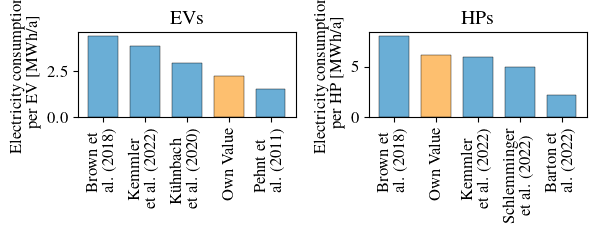

In [217]:
save_dir = "results/plots"
f, (a0, a1) = plt.subplots(1, 2, figsize=(6, 2.5), gridspec_kw={'width_ratios': [1, 1]})
colors_ev = get_colors(energy_ev_comparison)
colors_hp = get_colors(energy_hp_comparison)
df_plot = energy_ev_comparison.sort_values('relative consumption', ascending=False)
df_plot["relative consumption"].plot.bar(ax=a0, color=[colors_ev[bar] for bar in df_plot.index], width=0.7, 
                                         edgecolor="k", linewidth=0.3)
df_plot = energy_hp_comparison.sort_values('relative consumption', ascending=False)
df_plot["relative consumption"].plot.bar(ax=a1, color=[colors_hp[bar] for bar in df_plot.index], width=0.7, 
                                         edgecolor="k", linewidth=0.3)
#a0.set_xlabel("")
#a1.set_xlabel("")
a0.set_title("EVs")
a1.set_title("HPs")
a1.set_ylabel("Electricity consumption\n~~~~~~per HP [MWh/a]")
a0.set_ylabel("Electricity consumption\n~~~~~~per EV [MWh/a]")
#a1.set_yticklabels([])
a0.set_xticklabels(a0.get_xticklabels(), rotation=90)
a1.set_xticklabels(a1.get_xticklabels(), rotation=90)
plt.tight_layout()
save_dir_tmp = os.path.join(save_dir, "paper_dc_input_consumption_evs_and_hps.pdf")
#plt.savefig(save_dir_tmp)

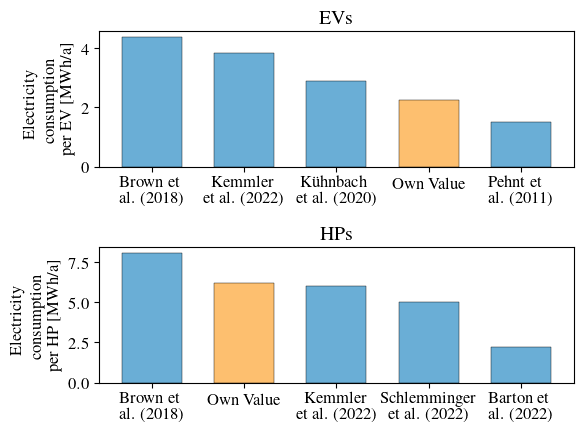

In [231]:
save_dir = "results/plots"
f, (a0, a1) = plt.subplots(2,1, figsize=(6, 4.5))
colors_ev = get_colors(energy_ev_comparison)
colors_hp = get_colors(energy_hp_comparison)
df_plot = energy_ev_comparison.sort_values('relative consumption', ascending=False)
df_plot["relative consumption"].plot.bar(ax=a0, color=[colors_ev[bar] for bar in df_plot.index], width=0.65, 
                                         edgecolor="k", linewidth=0.3)
df_plot = energy_hp_comparison.sort_values('relative consumption', ascending=False)
df_plot["relative consumption"].plot.bar(ax=a1, color=[colors_hp[bar] for bar in df_plot.index], width=0.65, 
                                         edgecolor="k", linewidth=0.3)
#a0.set_xlabel("")
#a1.set_xlabel("")
a0.set_title("EVs")
a1.set_title("HPs")
a1.set_ylabel("~~~~Electricity\n~~~consumption\nper HP [MWh/a]")
a0.set_ylabel("~~~~Electricity\n~~~consumption\nper EV [MWh/a]")
#a1.set_yticklabels([])
a0.set_xticklabels(a0.get_xticklabels(), rotation=0)
a1.set_xticklabels(a1.get_xticklabels(), rotation=0)
plt.tight_layout()
save_dir_tmp = os.path.join(save_dir, "paper_dc_input_consumption_evs_and_hps.pdf")
plt.savefig(save_dir_tmp)